<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/Time%20Series%20Basics/transform_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Data transforms are intended to remove noise and improve the signal in time series forecasting.

It can be very difficult to select a good, or even best, transform for a given prediction problem. There are many transforms to choose from and each has a different mathematical intuition.

In this tutorial, you will discover how to explore different power-based transforms for time series forecasting with Python.

After completing this tutorial, you will know:

> * How to identify when to use and how to explore a square root transform.
* How to identify when to use and explore a log transform and the expectations on raw data.
* How to use the Box-Cox transform to perform square root, log, and automatically discover the best power transform for your dataset.



# Dataset

## Airline Passengers Dataset
The Airline Passengers dataset describes a total number of airline passengers over time.

The units are a count of the number of airline passengers in thousands. There are 144 monthly observations from 1949 to 1960.

Download the dataset -> https://github.com/jbrownlee/Datasets/blob/master/airline-passengers.csv

### Loads and Plot Datasets

Running the example creates two plots, the first showing the time series as a line plot and the second showing the observations as a histogram.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('/content/airline_passengers.csv', index_col = 'Month', parse_dates=True)
series

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
plt.figure(1)
# define size of figure

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

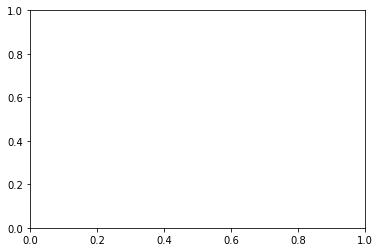

In [ ]:
plt.subplot()
# define plot

Line Plot

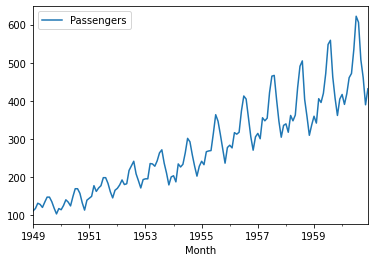

In [ ]:
series.plot()
# line plot for datasets

Text(0.5, 0, 'Year')

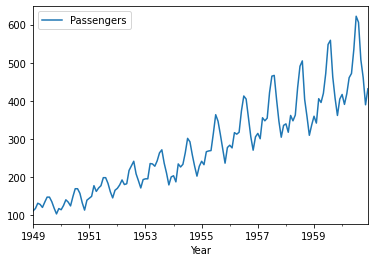

In [ ]:
# x label was month, we gonna change it to year
series.plot()
plt.xlabel('Year')

Text(0.5, 1.0, 'Airline Passengers')

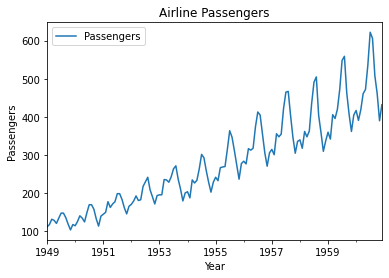

In [ ]:
# we gonna define y label also to passengers
# and we gonna put title
series.plot()
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Airline Passengers')

Histogram

Text(0.5, 1.0, 'Airline Passengers')

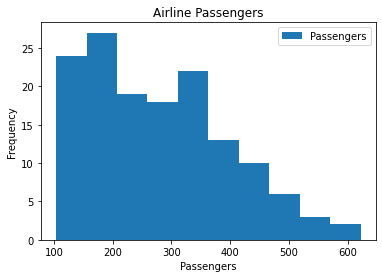

In [ ]:
# we will define 'hist' to create histogram
series.plot(kind='hist')
# the function of the kind variable is to define the type of graph/plot that we will use

plt.xlabel('Passengers')
# plt.ylabel('Passengers')
plt.title('Airline Passengers')

# Transformations in Time Series

## Square Root Transformations (Power Transformations)
A time series that has a quadratic growth trend can be made linear by taking the square root.

Let’s demonstrate this with a quick contrived example.

Consider a series of the numbers 1 to 99 squared. The line plot of this series will show a quadratic growth trend and a histogram of the values will show an exponential distribution with a long trail.

In [ ]:
import numpy as np

power_transform = [i**2 for i in range(1, 100)]
power_transform

[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801]

Line Plot

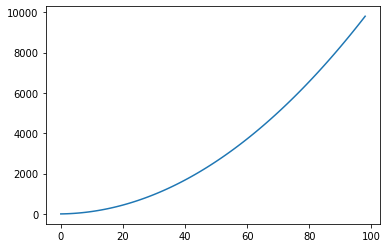

In [ ]:
plt.plot(power_transform)

Histogram

(array([31., 13., 10.,  8.,  8.,  6.,  6.,  6.,  5.,  6.]),
 array([1.000e+00, 9.810e+02, 1.961e+03, 2.941e+03, 3.921e+03, 4.901e+03,
        5.881e+03, 6.861e+03, 7.841e+03, 8.821e+03, 9.801e+03]),
 <a list of 10 Patch objects>)

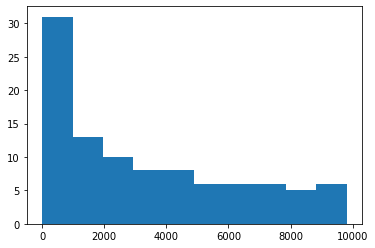

In [ ]:
plt.hist(power_transform)

If you see a structure like this in your own time series, you may have a quadratic growth trend. This can be removed or made linear by taking the inverse operation of the squaring procedure, which is the square root.

Because the example is perfectly quadratic, we would expect the line plot of the transformed data to show a straight line. Because the source of the squared series is linear, we would expect the histogram to show a uniform distribution

In [ ]:
import numpy as np

power_transform = [i**2 for i in range (1, 100)]
power_transform

[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801]

In [ ]:
# SQRT Transforms
transforms = np.sqrt(power_transform)
transforms

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
       92., 93., 94., 95., 96., 97., 98., 99.])

**Line Plot**

Line Plot for Power Transform (SQRT)

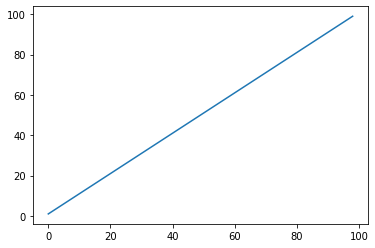

In [ ]:
plt.plot(transforms)

**Histogram**

Histogram for Power Transform (SQRT)

(array([10., 10., 10., 10.,  9., 10., 10., 10., 10., 10.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

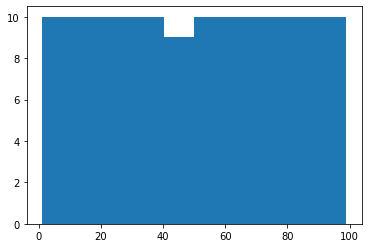

In [ ]:
plt.hist(transforms)

It is possible that the Airline Passengers dataset shows a quadratic growth. If this is the case, then we could expect a square root transform to reduce the growth trend to be linear and change the distribution of observations to be perhaps nearly Gaussian.

### Implementation Power Transform (SQRT) on Real Datasets

In [ ]:
!head /content/airline_passengers.csv

"Month","Passengers"
"1949-01",112
"1949-02",118
"1949-03",132
"1949-04",129
"1949-05",121
"1949-06",135
"1949-07",148
"1949-08",148
"1949-09",136


In [ ]:
series = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)
series

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
# Make a column for store values Square Root from passengers columns
series['SqrtPassengers'] = np.sqrt(series['Passengers'])
series['SqrtPassengers']

Month
1949-01-01    10.583005
1949-02-01    10.862780
1949-03-01    11.489125
1949-04-01    11.357817
1949-05-01    11.000000
                ...    
1960-08-01    24.617067
1960-09-01    22.538855
1960-10-01    21.470911
1960-11-01    19.748418
1960-12-01    20.784610
Name: SqrtPassengers, Length: 144, dtype: float64

**Line Plot**

Line Plot for Dataset Airline Passengers

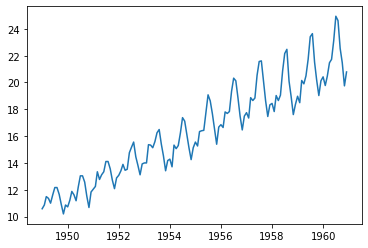

In [ ]:
plt.plot(series['SqrtPassengers'])

**Histogram**

Histogram for Dataset Airline Passengers

(array([ 7.,  9.,  8.,  9.,  9., 11., 10.,  7., 10.,  7.,  8., 15.,  5.,
        11.,  3.,  7.,  3.,  2.,  1.,  2.]),
 array([10.19803903, 10.93513347, 11.67222791, 12.40932235, 13.14641679,
        13.88351123, 14.62060567, 15.35770011, 16.09479455, 16.83188899,
        17.56898343, 18.30607787, 19.04317231, 19.78026675, 20.51736119,
        21.25445563, 21.99155007, 22.72864451, 23.46573895, 24.20283339,
        24.93992783]),
 <a list of 20 Patch objects>)

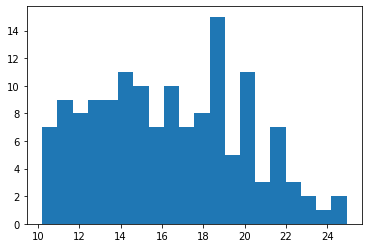

In [ ]:
plt.hist(series['SqrtPassengers'], bins=20)

## Log Transform
A class of more extreme trends are exponential, often graphed as a hockey stick.

Time series with an exponential distribution can be made linear by taking the logarithm of the values. This is called a log transform.

As with the square and square root case above, we can demonstrate this with a quick example.

In [ ]:
from math import exp
log_transform = [exp(i) for i in range(1, 100)]
log_transform

[2.718281828459045,
 7.38905609893065,
 20.085536923187668,
 54.598150033144236,
 148.4131591025766,
 403.4287934927351,
 1096.6331584284585,
 2980.9579870417283,
 8103.083927575384,
 22026.465794806718,
 59874.14171519782,
 162754.79141900392,
 442413.3920089205,
 1202604.2841647768,
 3269017.3724721107,
 8886110.520507872,
 24154952.7535753,
 65659969.13733051,
 178482300.96318725,
 485165195.4097903,
 1318815734.4832146,
 3584912846.131592,
 9744803446.248903,
 26489122129.84347,
 72004899337.38588,
 195729609428.83878,
 532048240601.79865,
 1446257064291.475,
 3931334297144.042,
 10686474581524.463,
 29048849665247.426,
 78962960182680.69,
 214643579785916.06,
 583461742527454.9,
 1586013452313430.8,
 4311231547115195.0,
 1.1719142372802612e+16,
 3.1855931757113756e+16,
 8.659340042399374e+16,
 2.3538526683702e+17,
 6.398434935300549e+17,
 1.739274941520501e+18,
 4.727839468229346e+18,
 1.2851600114359308e+19,
 3.4934271057485095e+19,
 9.496119420602448e+19,
 2.5813128861900675e+20

**Line Plot**

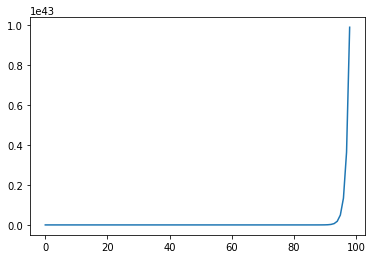

In [ ]:
plt.plot(log_transform)

**Histogram**


(array([96.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.71828183e+00, 9.88903032e+41, 1.97780606e+42, 2.96670910e+42,
        3.95561213e+42, 4.94451516e+42, 5.93341819e+42, 6.92232122e+42,
        7.91122426e+42, 8.90012729e+42, 9.88903032e+42]),
 <a list of 10 Patch objects>)

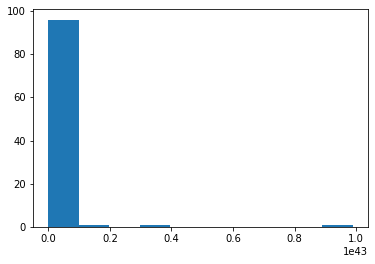

In [ ]:
plt.hist(log_transform)

We see an extreme increase on the line graph and an equally extreme long tail distribution on the histogram.

Again, we can transform this series back to linear by taking the natural logarithm of the values.

This would make the series linear and the distribution uniform. The example below demonstrates this for completeness.

In [ ]:
import numpy as np

transform = np.log(log_transform)
transform

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
       92., 93., 94., 95., 96., 97., 98., 99.])

**Line Plot**

Line Plot for Log Transform

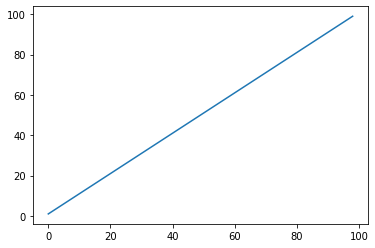

In [ ]:
plt.plot(transform)

Histogram

Histogram for Log Transform

(array([5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <a list of 20 Patch objects>)

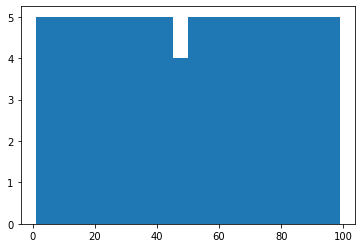

In [ ]:
plt.hist(transform, bins=20)

Our Airline Passengers dataset has a distribution of this form, but perhaps not this extreme.

### Implementation Log Transform (Log) on Real Datasets

In [ ]:
# series = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)
# series

In [ ]:
# Make a column for log transform from Passengers column
series['LogTransform'] = np.log(series['Passengers'])
series['LogTransform']

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: LogTransform, Length: 144, dtype: float64

Line Plot

Line Plot for Log Transform in Airline Passengers

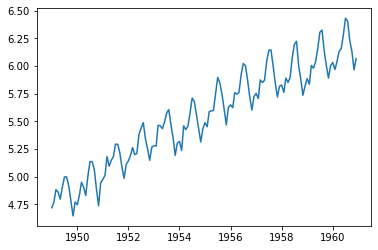

In [ ]:
plt.plot(series['LogTransform'])

**Histogram**

Histogram for Log Transform in Airline Passengers

(array([ 8., 14., 11., 20., 16., 15., 27., 17., 11.,  5.]),
 array([4.6443909 , 4.82324582, 5.00210074, 5.18095566, 5.35981058,
        5.5386655 , 5.71752042, 5.89637533, 6.07523025, 6.25408517,
        6.43294009]),
 <a list of 10 Patch objects>)

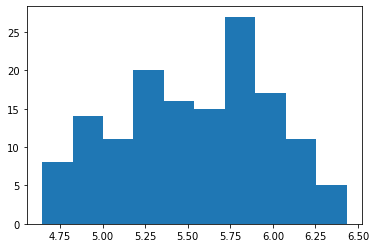

In [ ]:
plt.hist(series['LogTransform'])

Log transforms are popular with time series data as they are effective at removing exponential variance.

It is important to note that this operation assumes values are positive and non-zero. It is common to transform observations by adding a fixed constant to ensure all input values meet this requirement. For example:
`transform = log(constant + x)`

Where transform is the transformed series, constant is a fixed value that lifts all observations above zero, and x is the time series.

## Box-Cox Transform

The square root transform and log transform belong to a class of transforms called power transforms.

The Box-Cox transform is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.

More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your time series. The resulting series may be more linear and the resulting distribution more Gaussian or Uniform, depending on the underlying process that generated it.

The scipy.stats library provides an implementation of the Box-Cox transform. The boxcox() function takes an argument, called lambda, that controls the type of transform to perform.

Below are some common values for lambda

* lambda = -1. is a reciprocal transform.
* lambda = -0.5 is a reciprocal square root transform.
* lambda = 0.0 is a log transform.
* lambda = 0.5 is a square root transform.
* lambda = 1.0 is no transform.

In [ ]:
from scipy.stats import boxcox

# series = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)
# series

In [ ]:
# We're gonna define how big lam (lambda) from passengers using boxcox function
data, lam = boxcox(series['Passengers'])

In [ ]:
lam

0.14802265137037945

In [ ]:
# Declare new column based on result boxcox
series['BoxCoxPassengers'] = data
series.head()

,Passengers,SqrtPassengers,LogTransform,BoxCoxPassengers
Month,,,,
1949-01-01,112,10.583005,4.718499,6.827490
1949-02-01,118,10.862780,4.770685,6.932822
1949-03-01,132,11.489125,4.882802,7.161892
1949-04-01,129,11.357817,4.859812,7.114611
1949-05-01,121,11.000000,4.795791,6.983787


**Line Plot**

Line Plot for BoxCox Transforms Airline Passengers

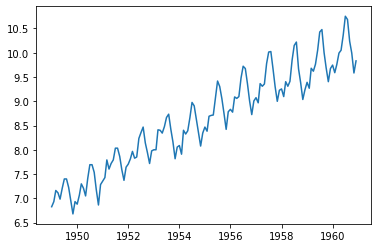

In [ ]:
plt.plot(series['BoxCoxPassengers'])

**Histogram**

Histogram for BoxCox Transforms Airline Passengers

(array([10., 14., 16., 14., 20., 21., 18., 16., 10.,  5.]),
 array([ 6.67930112,  7.08651626,  7.4937314 ,  7.90094654,  8.30816169,
         8.71537683,  9.12259197,  9.52980711,  9.93702225, 10.34423739,
        10.75145254]),
 <a list of 10 Patch objects>)

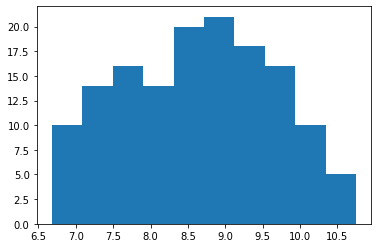

In [ ]:
plt.hist(series['BoxCoxPassengers'])